In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from neuron_decoding import *
import pickle

folder='' #ENTER THE FOLDER THAT YOUR DATA IS IN
# folder='/home/jglaser/Data/DecData/'

with open(folder+'data_loco_20170302_02.pickle','rb') as f:
    neural_data,pos_binned=pickle.load(f)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def speed_lr(neural_data, pos_binned):
    X=neural_data

    temp = np.diff(pos_binned, axis=0)
    vels_binned = np.concatenate((temp, temp[-1:, :]),axis=0)
    y = vels_binned

    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    return r2

In [12]:
import os
pn = 'data_binned'
r2s = []
for root, dirs, files in os.walk(pn):
    for file in files:
        if file.endswith('.pickle'):
            pickle_file_path = os.path.join(root, file)
            with open(pickle_file_path,'rb') as f:
                neural_data,pos_binned=pickle.load(f)
                r2 = speed_lr(neural_data,pos_binned)
                r2s.append(r2)




0.2743638488109575


In [13]:
print(r2s)

[0.42589066088460537, 0.4643818038180732, 0.39154487761770285, 0.36918363447963204, 0.46443138728379585, 0.3896087853987578, 0.25166580913322084, 0.33686906460876026, 0.467806062683537, 0.2743638488109575]


In [22]:
date = []
for root, dirs, files in os.walk(pn):
    for file in files:
        date.append(file[10:13])
print(date)

['213', '227', '215', '302', '301', '210', '214', '217', '228', '216']


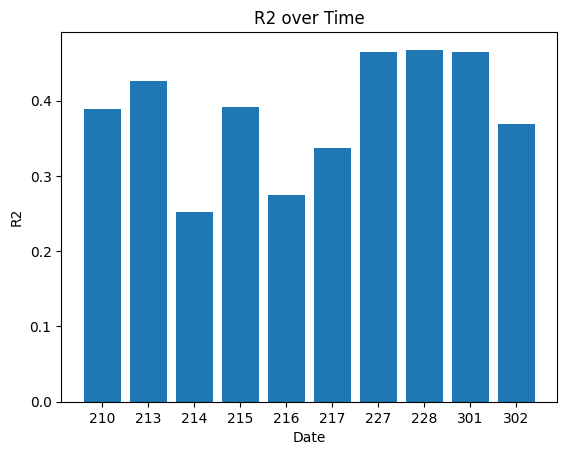

In [23]:
import pandas as pd
df = pd.DataFrame({
    'date': date,
    'r2': r2s
})
# 按日期排序
df = df.sort_values('date')
# 使用柱状图可视化数据
plt.bar(df['date'], df['r2'])
plt.xlabel('Date')
plt.ylabel('R2')
plt.title('R2 over Time')
plt.show()